# reading and inspecting the file information

In [1]:
BASE_PATH = '../datasets/UNSW-NB15/' # Path to the dataset
# The dataset can be downloaded from: http://cicresearch.ca/CICDataset/CIC-UNSW/Dataset/
# The dataset is available in the following link: https://www.unb.ca/cic/datasets/cic-unsw-nb15.html

import pandas as pd # importing pandas
df = pd.read_csv(BASE_PATH + "CICFlowMeter_out.csv", low_memory=False) # Read and store the dataset

df.columns = df.columns.str.strip()  # strip whitespaces from the column names
print("file is loaded successfully, whitespaces are stripped from the column names")

file is loaded successfully, whitespaces are stripped from the column names


In [2]:
"""_summary_
We'll be inspecting the dataset to understand its structure, data types, and any potential issues such as missing values or duplicates.
This will help us to understand the dataset better and prepare it for further analysis.
so we will print the following information:
1. The columns of the dataset
2. The shape of the dataset
3. The data types of the dataset
4. The description of the dataset
5. The number of missing values in each column
6. The number of unique values in each column
7. The number of duplicates in the dataset
8. The number of unique values in the ' Label' column
9. The unique values in the ' Label' column
10. The number of rows for each class
11. The number of rows for each class in percentage
"""


print("The dataset contains the following columns:")
print(df.columns) # Print the columns of the dataset

print("\n\nThe dataset contains the following number of rows and columns:")
print(df.shape) # Print the shape of the dataset

print("\n\nThe dataset contains the following data types:")
print(df.dtypes) # Print the data types of the dataset

print("\n\nThe description of the dataset:")
print(df.describe()) # Print the description of the dataset

print("\n\nThe dataset contains the following number of missing values:")
print(df.isnull().sum()) # Print the number of missing values in each column

print("\n\nThe dataset contains the following number of unique values:")
print(df.nunique()) # Print the number of unique values in each column

print("\n\nThe dataset contains the following number of duplicates:")
print(df.duplicated().sum()) # Print the number of duplicates in the dataset

print("\n\nThe dataset contains the following number of classes:")
print(df['Label'].nunique()) # Print the number of unique values in the ' Label' column

print("\n\nThe dataset contains the following classes:")
print(df['Label'].unique()) # Print the unique values in the ' Label' column

print("\n\nThe dataset contains the following number of rows for each class:")
print(df['Label'].value_counts()) # Print the number of rows for each class

print("\n\nThe dataset contains the following number of rows for each class in percentage:")
print(df['Label'].value_counts(normalize=True)) # Print the number of rows for each class in percentage

The dataset contains the following columns:
Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Me

In [3]:
from sklearn.model_selection import train_test_split

sample_pre, _ = train_test_split(
    df,
    train_size=1000,
    stratify=df['Label'],
    random_state=42
)

# export
sample_pre.to_csv('pre-processed_sample.csv', index=False)
print("Class distribution in preprocessed sample:")
print(sample_pre['Label'].value_counts())

Class distribution in preprocessed sample:
Label
Benign            975
Exploits            9
Fuzzers             8
Reconnaissance      5
DoS                 1
Generic             1
Shellcode           1
Name: count, dtype: int64


# pre-processing the information

In [4]:
import numpy as np

before = df.shape[0] # Store the number of rows before dropping NaN, Inf, duplicate, non-feature values

# === 1- dropping NaN and Inf values ===
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace Inf and -Inf values with NaN (so that we can drop them as NaN values)
# after replacing Inf and -Inf values with NaN, we can drop al the NaN values
df.dropna(inplace=True) # Drop NaN values
print("\n\nThe dataset contains the following number of rows after dropping NaN and Inf values:")
print(df.shape) # Print the shape of the dataset after dropping NaN and Inf values

# === 2- dropping Non-feature columns ===
# Drop non-feature columns (columns that are not used for training the model)
to_drop = ['Flow ID','Src IP','Dst IP']
df = df.drop(columns=to_drop)
print("\n\nThe dataset contains the following columns after dropping Non-feature columns:")
print(df.columns) # Print the columns of the dataset after dropping Non-feature columns

# === 3- dropping duplicates ===
df.drop_duplicates(inplace=True) # Drop duplicates
print("\n\nThe dataset contains the following number of rows after dropping duplicates:")
print(df.shape) # Print the shape of the dataset after dropping duplicates

after = df.shape[0] # Store the number of rows after dropping NaN, Inf, duplicate, non-feature values
print(f"\n\n{before - after} rows are dropped from the dataset") # Print the number of rows dropped from the dataset
# Print the percentage of the dataset kept after dropping NaN, Inf, duplicate, non-feature values
print(f"{after / before * 100:.2f}% of the dataset is kept after dropping NaN, Inf, duplicate, non-feature values") 




The dataset contains the following number of rows after dropping NaN and Inf values:
(3540241, 84)


The dataset contains the following columns after dropping Non-feature columns:
Index(['Src Port', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Le

In [5]:
# === 4- Outlier capping at 1st/99th percentiles ===
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

total_capped = 0
capped_per_col = {}

for col in numeric_cols:
    low, high = df[col].quantile([0.01, 0.99])
    # count how many would get capped
    below = (df[col] < low).sum()
    above = (df[col] > high).sum()
    capped = below + above

    if capped > 0:
        capped_per_col[col] = capped
        total_capped += capped

    # now perform the actual clipping
    df[col] = df[col].clip(lower=low, upper=high)

print(f"Total values capped across all columns: {total_capped}")
for col, cnt in capped_per_col.items():
    print(f"  • {col}: {cnt} values capped")

Total values capped across all columns: 1995961
  • Src Port: 37100 values capped
  • Dst Port: 34806 values capped
  • Flow Duration: 68835 values capped
  • Total Fwd Packet: 34500 values capped
  • Total Bwd packets: 40974 values capped
  • Total Length of Fwd Packet: 34653 values capped
  • Total Length of Bwd Packet: 34789 values capped
  • Fwd Packet Length Max: 12156 values capped
  • Fwd Packet Length Min: 8737 values capped
  • Fwd Packet Length Mean: 11507 values capped
  • Fwd Packet Length Std: 33984 values capped
  • Bwd Packet Length Max: 8935 values capped
  • Bwd Packet Length Min: 513 values capped
  • Bwd Packet Length Mean: 28810 values capped
  • Bwd Packet Length Std: 3982 values capped
  • Flow Bytes/s: 34803 values capped
  • Flow Packets/s: 66303 values capped
  • Flow IAT Mean: 67910 values capped
  • Flow IAT Std: 66082 values capped
  • Flow IAT Max: 68841 values capped
  • Flow IAT Min: 28846 values capped
  • Fwd IAT Total: 34804 values capped
  • Fwd IAT M

In [6]:
# === 5- Convert the ' Label' column to binary classification ===

# collapsing all the 9 NON-Benign classes into a single class called 'Malicious', and keeping the 'Benign' class as is
df['Label'] = df['Label'].apply(lambda x: 'Benign' if x == 'Benign' else 'Malicious') # Convert the ' Label' column to binary classification
print("\n\nThe dataset contains the following number of classes after converting to binary classification:")
print(df['Label'].nunique()) # Print the number of unique values in the ' Label' column after converting to binary classification

print("\n\nThe dataset contains the following number of rows for each class in percentage:")
print(df['Label'].value_counts(normalize=True)) # Print the number of rows for each class in percentage

print("\n\nThe dataset contains the following number of elements for each class:")
print(df['Label'].value_counts()) # Print the number of elements for each class



The dataset contains the following number of classes after converting to binary classification:
2


The dataset contains the following number of rows for each class in percentage:
Label
Benign       0.97426
Malicious    0.02574
Name: proportion, dtype: float64


The dataset contains the following number of elements for each class:
Label
Benign       3390752
Malicious      89583
Name: count, dtype: int64


In [7]:
# === 6- Feature scaling ===
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# scale all numeric
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# confirm everything is now in [0,1]
print("Overall min:", df[numeric_cols].min().min())
print("Overall max:", df[numeric_cols].max().max())

print("Feature scaling is succissfully done using MinMaxScaler")

Overall min: 0.0
Overall max: 1.0000000000000002
Feature scaling is succissfully done using MinMaxScaler


In [8]:
# === 7- Label encoding ===

# encode Label
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
print("Label encoding is done successfully")

# print the mapping of the labels to the encoded values
code_to_name = {i: name for i, name in enumerate(le.classes_)}
print(pd.DataFrame({
    "encoded": list(code_to_name.keys()),
    "label":   list(code_to_name.values())
}))

Label encoding is done successfully
   encoded      label
0        0     Benign
1        1  Malicious


In [9]:
# === 8- Performing dimensionality reduction using PCA ===

from sklearn.decomposition import PCA

# select your scaled feature matrix
X = df[numeric_cols].values    # numeric_cols came from your outlier-capping cell

# keep enough PCs to explain 97.5% of variance
pca = PCA(n_components=0.975, random_state=42)
X_pca = pca.fit_transform(X)
PCA_COMPONENTS = pca.n_components_  # number of components to keep

print(f"Original dimension: {X.shape[1]} → PCA dimension: {pca.n_components_}")

# wrap back into a DataFrame
pc_cols = [f"PC{i+1}" for i in range(pca.n_components_)]
df_pca = pd.DataFrame(X_pca, columns=pc_cols, index=df.index)
df_pca['Label'] = df['Label'].values  # carry over your binary label


print("\n\nPCA is done successfully")
print("\n\nThe dataset contains the following columns after PCA:")
print(df_pca.columns) # Print the columns of the dataset after PCA

Original dimension: 79 → PCA dimension: 18


PCA is done successfully


The dataset contains the following columns after PCA:
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18',
       'Label'],
      dtype='object')


In [10]:
# === 9- exporting a 1000 of the processed sample ===

sample_proc, _ = train_test_split(
    df_pca,
    train_size=1000,
    stratify=df_pca['Label'],
    random_state=42
)
# export
sample_proc.to_csv('processed_sample.csv', index=False)
print("\nClass distribution in processed sample:")
print(sample_proc['Label'].value_counts())


Class distribution in processed sample:
Label
0    974
1     26
Name: count, dtype: int64


In [11]:
# === 9- Splitting the dataset into X and Y sets ===

from imblearn.under_sampling import RandomUnderSampler

# define features & target
X_feat = df_pca.drop(columns='Label')
y_target = df_pca['Label']

# === 10- resampling the dataset ===

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_res, y_res = rus.fit_resample(X_feat, y_target)

print("Resampled class counts:")
print(pd.Series(y_res).value_counts())

Resampled class counts:
Label
0    89583
1    89583
Name: count, dtype: int64


# Model training

In [12]:
# === 11- Splitting the dataset into training and testing sets ===

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,
    stratify=y_res,
    random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (143332, 18) Test shape: (35834, 18)


In [13]:
# === 12-  Random Forest training & evaluation ===

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Instantiate
rf = RandomForestClassifier(
    n_estimators=200,         # number of trees
    max_depth=None,           # grow until purity or min samples
    class_weight='balanced',  # weight classes inversely to frequency
    random_state=42,
    n_jobs=-1                 # use all cores
)

# 2) Fit on training data
rf.fit(X_train, y_train)

# 3) Predict on test set
y_pred = rf.predict(X_test)

# 4) Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign','Malicious'], digits=5))

Accuracy: 0.9895629848747

Confusion Matrix:
[[17595   322]
 [   52 17865]]

Classification Report:
              precision    recall  f1-score   support

      Benign    0.99705   0.98203   0.98948     17917
   Malicious    0.98230   0.99710   0.98964     17917

    accuracy                        0.98956     35834
   macro avg    0.98967   0.98956   0.98956     35834
weighted avg    0.98967   0.98956   0.98956     35834



In [14]:
# === 13- Cross-validation ===

from sklearn.model_selection import cross_validate
import numpy as np

# define the set of metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

cv_results = cross_validate(
    estimator=rf,
    X=X_res,
    y=y_res,
    cv=5,
    scoring=scoring,
    return_train_score=False
)

# cv_results is a dict whose keys are 'test_accuracy', 'test_precision', etc.
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"5-fold {metric:<9}: {scores}")
    print(f"Mean {metric:<9}: {scores.mean():.4f}\n")

5-fold accuracy : [0.98981414 0.99003712 0.99101387 0.99059526 0.98978595]
Mean accuracy : 0.9902

5-fold precision: [0.98448714 0.98252267 0.98393663 0.98429752 0.98325899]
Mean precision: 0.9837

5-fold recall   : [0.99531172 0.99782317 0.99832552 0.99709773 0.9965396 ]
Mean recall   : 0.9970

5-fold f1       : [0.98986983 0.99011382 0.99107885 0.99065628 0.98985475]
Mean f1       : 0.9903



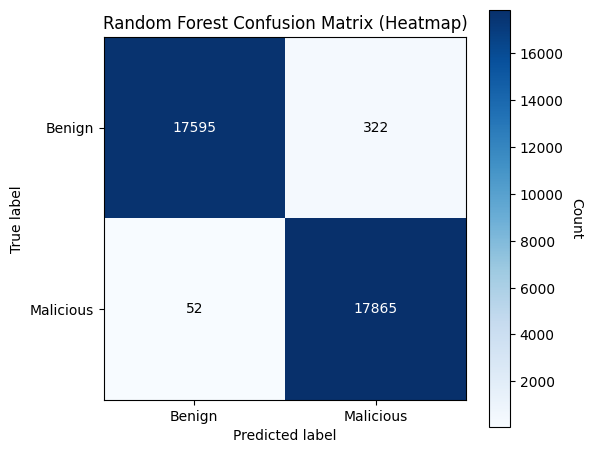

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 1) Compute the matrix
cm = confusion_matrix(y_test, y_pred)

# 2) Plot as heatmap
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest', cmap='Blues')

# 3) Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Count", rotation=-90, va="bottom")

# 4) Annotate each cell with its count
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

# 5) Labels, ticks, and titles
ax.set(
    xticks=[0, 1],
    yticks=[0, 1],
    xticklabels=['Benign', 'Malicious'],
    yticklabels=['Benign', 'Malicious'],
    xlabel="Predicted label",
    ylabel="True label",
    title="Random Forest Confusion Matrix (Heatmap)"
)

plt.tight_layout()
plt.show()

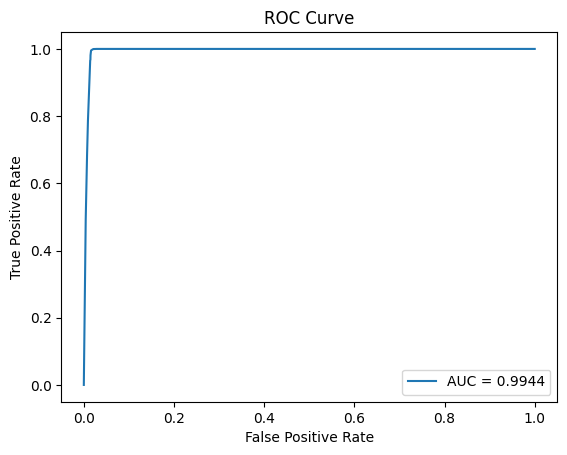

In [16]:
from sklearn.metrics import roc_curve, auc
y_proba = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(); plt.show()

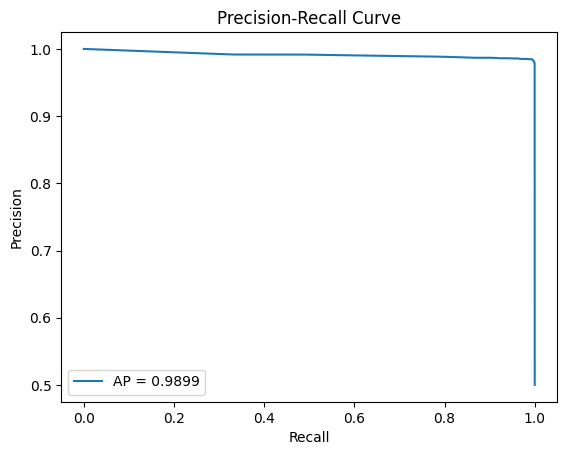

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score
prec, rec, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.plot(rec, prec, label=f"AP = {ap:.4f}")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(); plt.show()

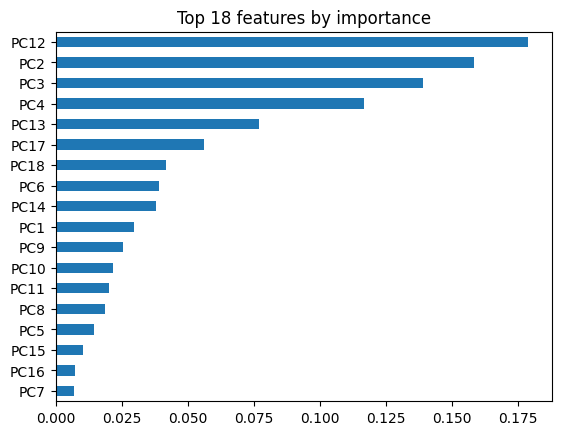

In [18]:
import pandas as pd
fi = pd.Series(data=rf.feature_importances_, index=X_train.columns)
fi.sort_values().tail(PCA_COMPONENTS).plot(kind="barh")
plt.title(f"Top {PCA_COMPONENTS} features by importance"); plt.show()

# Implementing and training the additional 4 models

In [19]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

# Set the maximum number of CPU cores to use for parallel processing
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

# 1) Define all five models
models = {
    'Random Forest'        : rf,  # the already-fitted RF
    
    'K-Nearest Neighbors'  : KNeighborsClassifier(),
        
    'XGBoost'              : XGBClassifier(
                                # use_label_encoder=False,
                                eval_metric='logloss',
                                random_state=42,
                                verbosity=0
                             ),
    
    'SVM (RBF kernel)'     : SVC(probability=True,
                                 class_weight='balanced',
                                 random_state=42),
    
    'MLP (Neural Net)' : MLPClassifier(
                             hidden_layer_sizes=(100,),
                             max_iter=300,
                             random_state=42),
    }

# 2) Train each and collect metrics on the SAME train/test split
rows = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rows.append({
        'Model'     : name,
        'Accuracy'  : accuracy_score(y_test, y_pred),
        'Precision' : precision_score(y_test, y_pred),
        'Recall'    : recall_score(y_test, y_pred),
        'F1 Score'  : f1_score(y_test, y_pred)
    })
    print(f"name: {name} has been trained successfully")

# 3) Build a comparison table
df_compare = pd.DataFrame(rows).set_index('Model')
print(f"\n\n{df_compare}")

name: Random Forest has been trained successfully
name: K-Nearest Neighbors has been trained successfully
name: XGBoost has been trained successfully
name: SVM (RBF kernel) has been trained successfully
name: MLP (Neural Net) has been trained successfully


                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Random Forest        0.989563   0.982295  0.997098  0.989641
K-Nearest Neighbors  0.989535   0.981553  0.997823  0.989621
XGBoost              0.990679   0.982970  0.998660  0.990753
SVM (RBF kernel)     0.989172   0.980589  0.998102  0.989268
MLP (Neural Net)     0.990958   0.983032  0.999163  0.991032


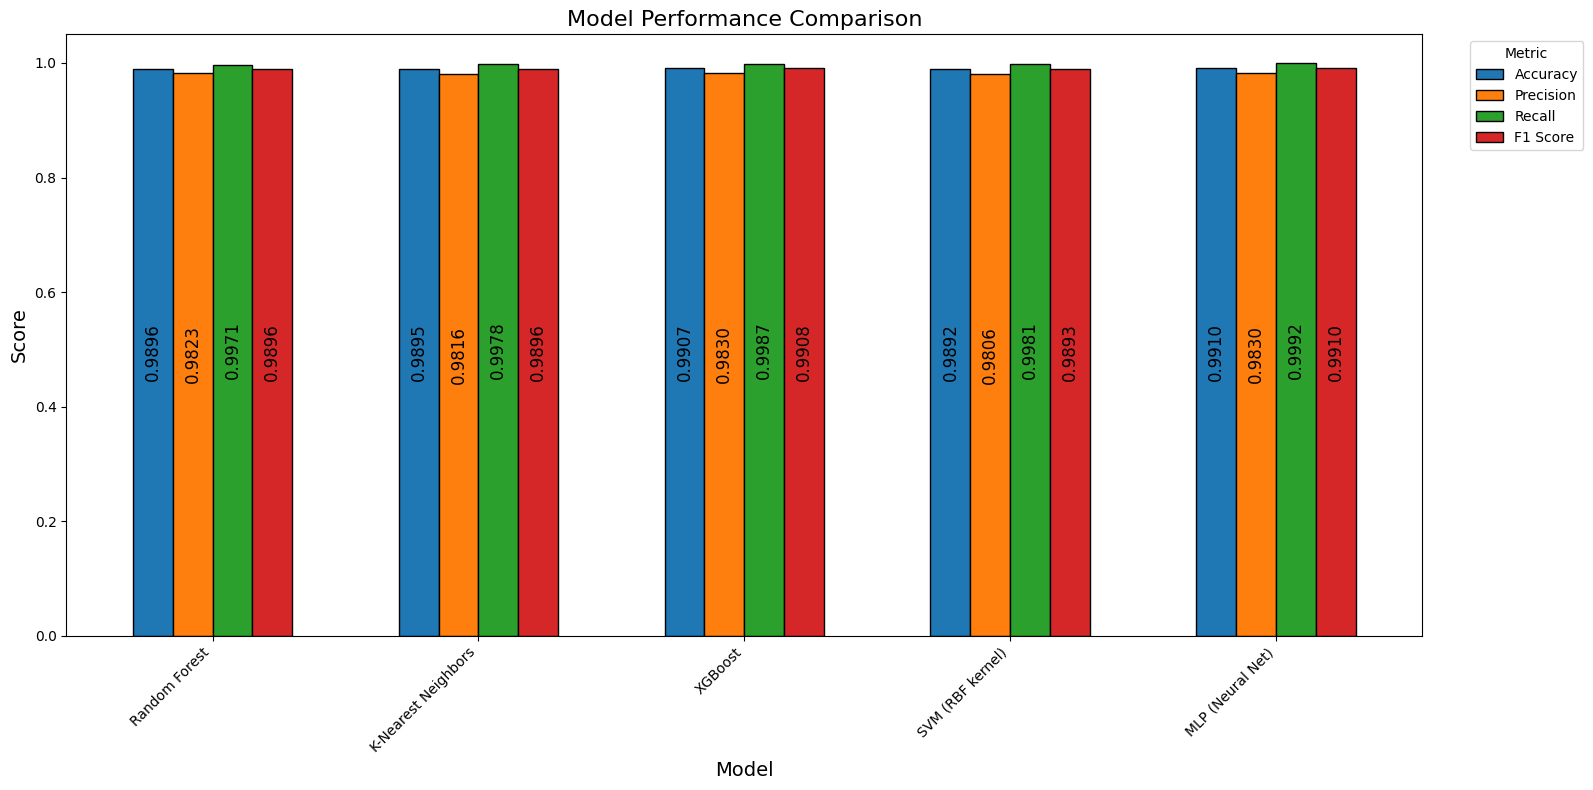

Best Accuracy: MLP (Neural Net) (0.9910)
Best Precision: MLP (Neural Net) (0.9830)
Best Recall: MLP (Neural Net) (0.9992)
Best F1 Score: MLP (Neural Net) (0.9910)



=== General ranking (by average of all four metrics) ===
Model
MLP (Neural Net)       0.991046
XGBoost                0.990766
Random Forest          0.989649
K-Nearest Neighbors    0.989633
SVM (RBF kernel)       0.989283
Name: Mean Score, dtype: float64

=== Specific rankings ===

– Accuracy ranking:
Model
MLP (Neural Net)       0.990958
XGBoost                0.990679
Random Forest          0.989563
K-Nearest Neighbors    0.989535
SVM (RBF kernel)       0.989172
Name: Accuracy, dtype: float64

– Precision ranking:
Model
MLP (Neural Net)       0.983032
XGBoost                0.982970
Random Forest          0.982295
K-Nearest Neighbors    0.981553
SVM (RBF kernel)       0.980589
Name: Precision, dtype: float64

– Recall ranking:
Model
MLP (Neural Net)       0.999163
XGBoost                0.998660
SVM (RBF kernel)       0

In [20]:
import matplotlib.pyplot as plt

# 1) Bigger canvas
fig, ax = plt.subplots(figsize=(16, 8))

# 2) Slimmer bars
df_compare.plot.bar(ax=ax, width=0.6, edgecolor='black')

# 3) Annotate **inside** each bar at mid‐height,
#    rotated vertically, in white for contrast
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() / 2,
        f"{p.get_height():.4f}",
        ha='center',
        va='center',
        rotation=90,
        color='black',
        fontsize=12,
    )

# 4) Polish axes & legend
ax.set_xlabel("Model", fontsize=14)
ax.set_ylabel("Score", fontsize=14)
ax.set_title("Model Performance Comparison", fontsize=16)
ax.legend(title="Metric", bbox_to_anchor=(1.03, 1), loc="upper left")

# 5) Tidy layout
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)        # ensure bars + text fit
plt.tight_layout()
plt.show()


# — 2) Best model per metric —
for metric in df_compare.columns:
    best = df_compare[metric].idxmax()
    value = df_compare[metric].max()
    print(f"Best {metric}: {best} ({value:.4f})")


# 1) Compute a combined “Mean Score” and general ranking
df_compare['Mean Score'] = df_compare.mean(axis=1)
general_ranking = df_compare['Mean Score'].sort_values(ascending=False)
print("\n\n\n=== General ranking (by average of all four metrics) ===")
print(general_ranking)

# 2) Specific rankings by each metric
print("\n=== Specific rankings ===")
for metric in ['Accuracy','Precision','Recall','F1 Score']:
    ranking = df_compare[metric].sort_values(ascending=False)
    print(f"\n– {metric} ranking:")
    print(ranking)